# All Imports

In [1]:
import numpy as np
import sep

In [2]:
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib import rcParams

%matplotlib inline

rcParams['figure.figsize'] = [10., 8.]

# Open File + Read Data

In [3]:
with fits.open("image.fits") as hdul:
    data = hdul[0].data

ESO-LOG 00:00:00> DATE         = '1992-10-26'  / Mon Oct 26, 1992                [astropy.io.fits.card]
ESO-LOG 03:04:08>-START EXPO EMMI RED          / Start exp. on EMMI Red CC       [astropy.io.fits.card]
ESO-LOG 03:04:09> EXPO EMMI RED NO = 24887     / Exp. num. on EMMI Red CCD       [astropy.io.fits.card]
ESO-LOG 03:10:52>-STOP EXPO EMMI RED           / Stop exp. on EMMI Red CCD       [astropy.io.fits.card]
[W 2024-12-10 02:57:32,524.524 astropy] The following header keyword is invalid or follows an unrecognized non-standard convention:
ESO-LOG 00:00:00> DATE         = '1992-10-26'  / Mon Oct 26, 1992               
[W 2024-12-10 02:57:32,529.529 astropy] The following header keyword is invalid or follows an unrecognized non-standard convention:
ESO-LOG 03:04:08>-START EXPO EMMI RED          / Start exp. on EMMI Red CC      
[W 2024-12-10 02:57:32,531.531 astropy] The following header keyword is invalid or follows an unrecognized non-standard convention:
ESO-LOG 03:04:09> EXPO EMM

# Show Starting Image

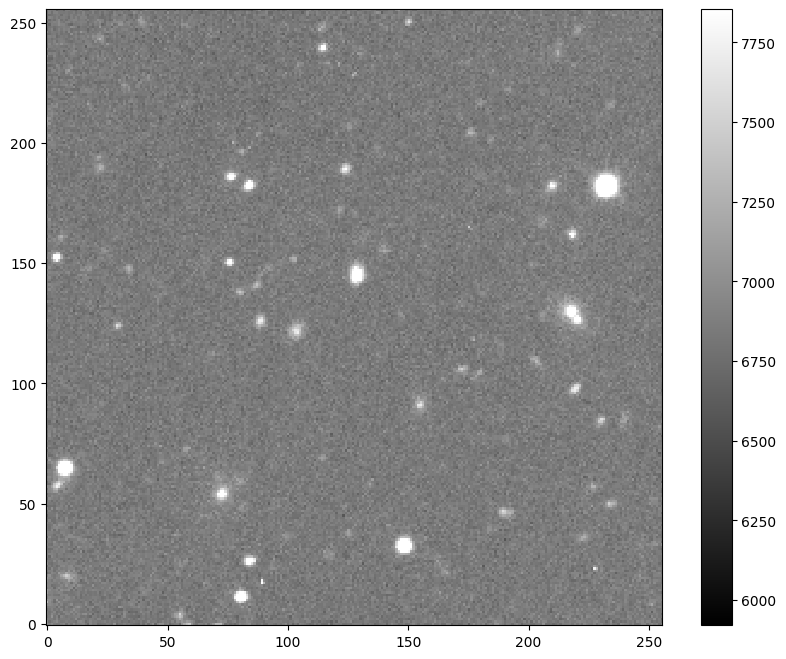

In [4]:
m, s = np.mean(data), np.std(data)
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();
plt.savefig("p2_fig_1", bbox_inches='tight', dpi=300)

# Swap bytes to fit expected 

In [5]:
bkg = sep.Background(data)

In [6]:
# evaluate background as 2-d array, same size as original image
bkg_image = bkg.back()
# bkg_image = np.array(bkg) # equivalent to above

# Take an average of each of the pixels in the image to figure out what is the backround

In [7]:
# get a "global" mean and noise of the image background:
print(bkg.globalback)
print(bkg.globalrms)

6852.04931640625
65.46174621582031


# Show and save just backround

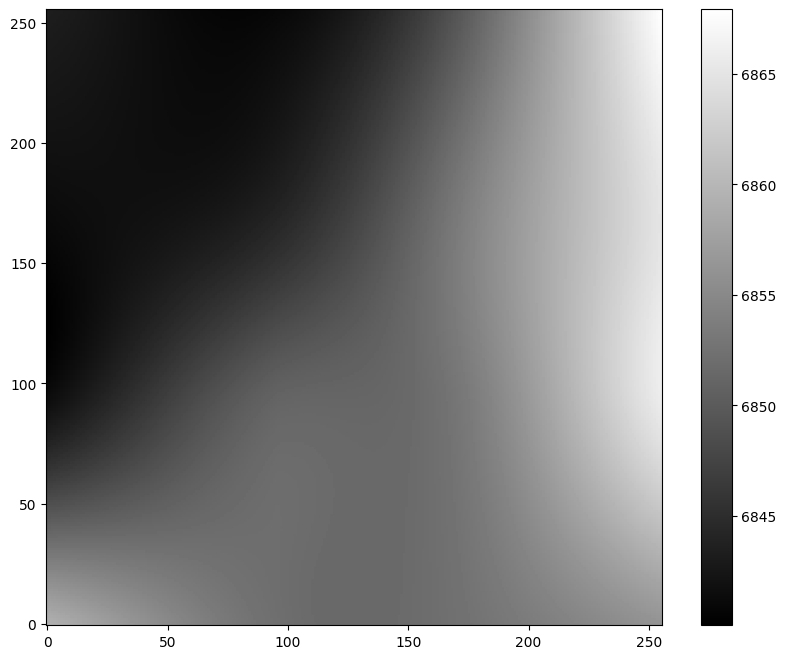

In [8]:
# show the background
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.savefig("fig_2", bbox_inches='tight', dpi=300)

In [9]:
# evaluate the background noise as 2-d array, same size as original image
bkg_rms = bkg.rms()

# Show a figure of the amount of noise in the backround

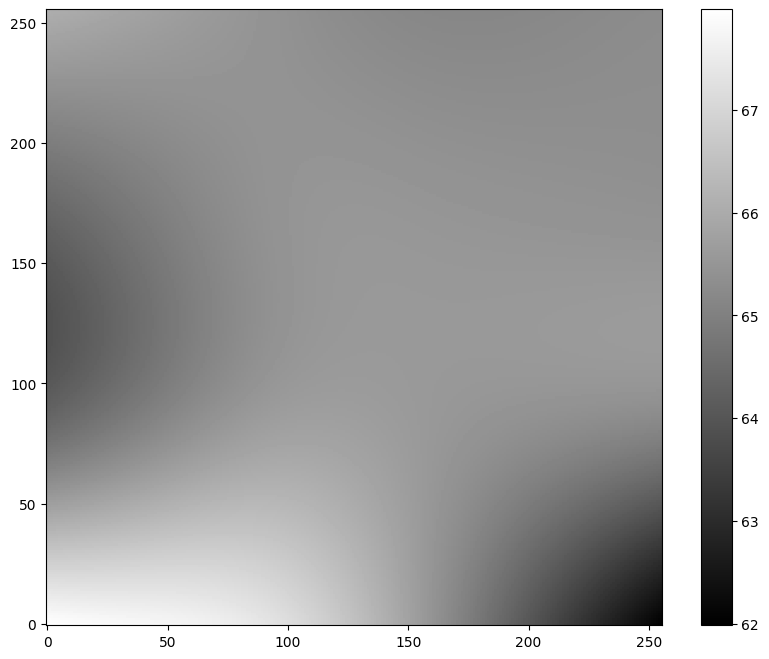

In [10]:
# show the background noise
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.savefig("fig_3", bbox_inches='tight', dpi=300)

# Get leftover after deleting backround

In [11]:
# subtract the background
data_sub = data - bkg

In [12]:
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

# Detect amount of objects

In [13]:
#how many objects were detected
len(objects)

69

# Take all plots and circle them

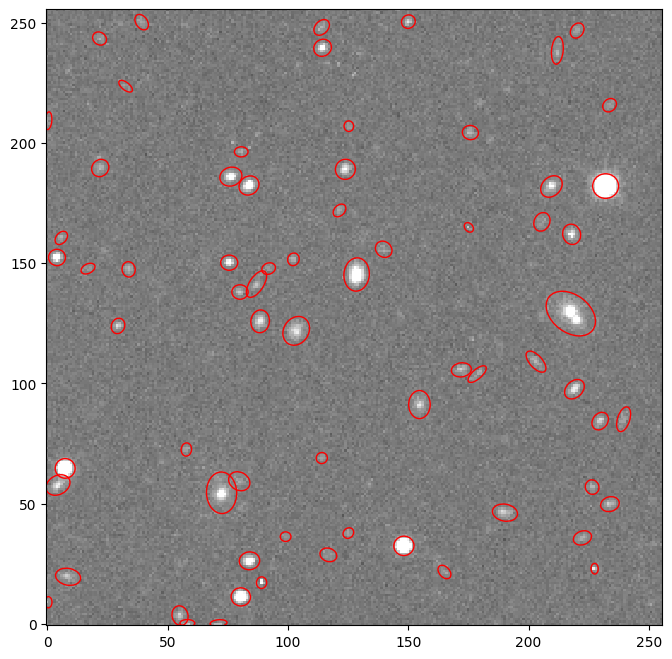

In [14]:
from matplotlib.patches import Ellipse

# plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# plot an ellipse for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)
plt.savefig("fig_4", bbox_inches='tight', dpi=300)

In [15]:
# available fields
objects.dtype.names

('thresh',
 'npix',
 'tnpix',
 'xmin',
 'xmax',
 'ymin',
 'ymax',
 'x',
 'y',
 'x2',
 'y2',
 'xy',
 'errx2',
 'erry2',
 'errxy',
 'a',
 'b',
 'theta',
 'cxx',
 'cyy',
 'cxy',
 'cflux',
 'flux',
 'cpeak',
 'peak',
 'xcpeak',
 'ycpeak',
 'xpeak',
 'ypeak',
 'flag')

# create data holders

In [16]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'],
                                     3.0, err=bkg.globalrms, gain=1.0)

# First 10 objects

In [17]:
# show the first 10 objects results:
for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))

object 0: flux = 2249.159297 +/- 291.027802
object 1: flux = 3092.220430 +/- 291.592204
object 2: flux = 5949.868379 +/- 356.562003
object 3: flux = 1851.426582 +/- 295.028816
object 4: flux = 72736.386914 +/- 440.172206
object 5: flux = 3860.756152 +/- 352.163162
object 6: flux = 6418.913789 +/- 357.458973
object 7: flux = 2210.707656 +/- 350.791223
object 8: flux = 2741.607227 +/- 352.277746
object 9: flux = 20916.875566 +/- 376.966138
